# Домашняя работа №2

In [1]:
import numpy as np
from scipy.optimize import approx_fprime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import math
import sympy

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks

%matplotlib inline

### Задание 1

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


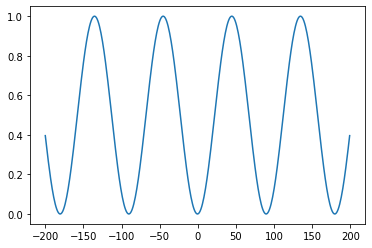

In [2]:
x = np.array([i for i in range(-200, 200)])
y = np.array([math.sin(math.radians(2*x_i+1))**2 for x_i in x])
plt.plot(x, y)

In [3]:
list_der = []
for i in range(len(x)-1):
    list_der.append((y[i+1]-y[i])/(x[i+1]-x[i]))
list_der.append(list_der[-1])

In [4]:
list_second_der = []
for i in range(len(x)-1):
    list_second_der.append((list_der[i+1]-list_der[i])/(x[i+1]-x[i]))
list_second_der.append(list_second_der[-1])

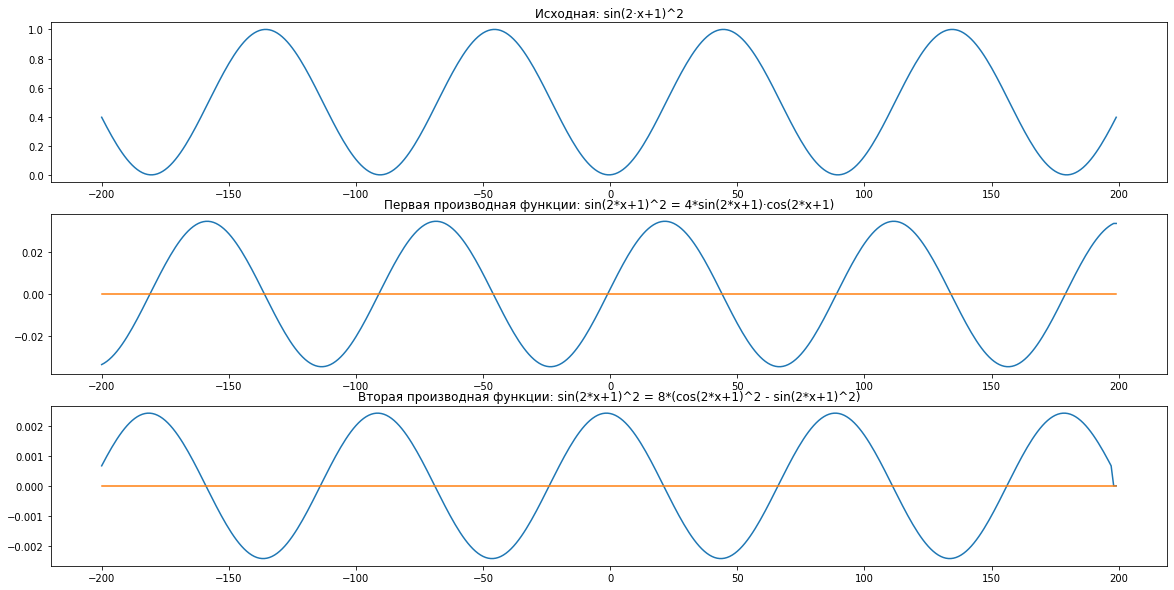

In [5]:
fig, axs = plt.subplots(3,figsize=(20,10))
axs[0].set_title('Исходная: sin(2·x+1)^2')
axs[0].plot(x, y)
axs[1].set_title('Первая производная функции: sin(2*x+1)^2 = 4*sin(2*x+1)·cos(2*x+1)')
axs[1].plot(x, list_der)
axs[1].plot(x, [0 for i in range(len(list_der))], '-')
axs[2].set_title('Вторая производная функции: sin(2*x+1)^2 = 8*(cos(2*x+1)^2 - sin(2*x+1)^2)')
axs[2].plot(x, list_second_der)
axs[2].plot(x, [0 for i in range(len(list_der))], '-')

### Задание 2: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

In [6]:
from sympy import *
x, y = symbols('x y')
diff((y**3)*2*(x**2)+1/x+(y**2)*x+7,x)

4*x*y**3 + y**2 - 1/x**2

In [7]:
x, y = symbols('x y')
diff((y**3)*2*(x**2)+1/x+(y**2)*x+7,y)

6*x**2*y**2 + 2*x*y

In [8]:
f=(y**3)*2*(x**2)+1/x+(y**2)*x+7
f_x_diff=f.diff(x)
f_x_diff=lambdify([x,y],f_x_diff)
f_x_diff(1,2)

35.0

In [9]:
f_y_diff=f.diff(y)
f_y_diff=lambdify([x,y],f_y_diff)
f_y_diff(1,2)

28

### Задание 3

Найти точки минимума в следующих данных (колонка height):

In [10]:
import pandas as pd
data = pd.read_csv('video.csv')
data.head()

,sec,x1,y1,x2,y2,height
0,0,875,1411,1008,1835,414
1,1,883,1377,1057,1873,417
2,2,862,1397,1066,1872,417
3,3,878,1394,1046,1875,417
4,4,910,1378,1070,1866,417


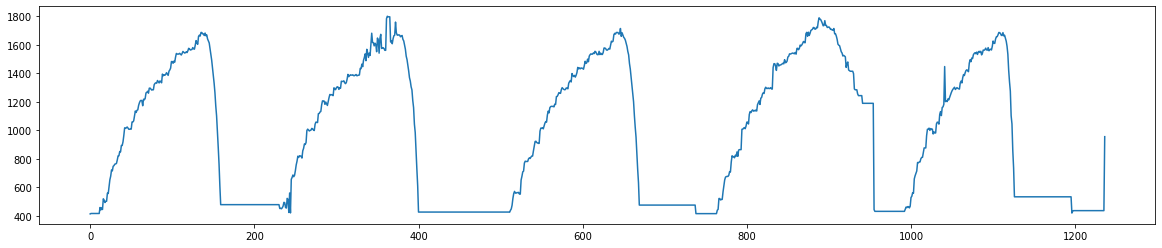

In [11]:
plt.figure(figsize=(20,4))
plt.plot(data.height)
plt.show()

In [12]:
data_inv =data * -1

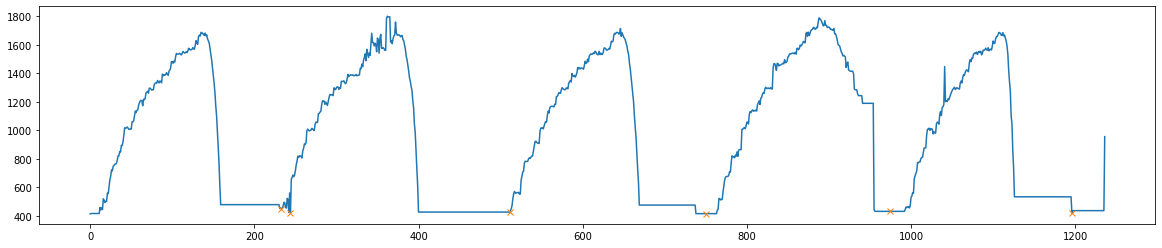

In [13]:
peaks, _ = find_peaks(data_inv.height, prominence=1, width=20)
plt.figure(figsize=(20,4))
plt.plot(data.height)
plt.plot(peaks, data.height[peaks], "x")
plt.show()

In [14]:
peaks

array([ 233,  244,  511,  750,  974, 1196], dtype=int64)